In [153]:
import numpy as np

In [154]:
hbarc = 197

l = 0
kappa = -l - 1
m = 1
omega = 1

In [155]:
def f(r,u,v,E):

    f = - ( (kappa / r) + m * omega * r) * u + (E + m) * v 

    return f

def g(r,u,v,E):

    g =  ( (kappa / r) + m * omega * r) * v - (E - m) * u 

    return g

In [156]:
def runge_kutta_coupled(r, u, v, h, n, E):

    for i in range(n-1):

        F1 = f(r[i], u[i], v[i], E)
        G1 = g(r[i], u[i], v[i], E)

        F2 = f(r[i] + ( h / 2. ), u[i] + F1 * ( h / 2. ), v[i] + G1 * ( h / 2. ), E)
        G2 = g(r[i] + ( h / 2. ), u[i] + F1 * ( h / 2. ), v[i] + G1 * ( h / 2. ), E)

        F3 = f(r[i] + ( h / 2. ), u[i] + F2 * ( h / 2. ), v[i] + G2 * ( h / 2. ), E)
        G3 = g(r[i] + ( h / 2. ), u[i] + F2 * ( h / 2. ), v[i] + G2 * ( h / 2. ), E)

        F4 = f(r[i] + h, u[i] + F3 * h, v[i] + G3 * h, E)
        G4 = g(r[i] + h, u[i] + F3 * h, v[i] + G3 * h, E)
        
        u[i + 1] = u[i] + ( h / 6. ) * (F1 + 2. * F2 + 2. * F3 + F4)
        v[i + 1] = v[i] + ( h / 6. ) * (G1 + 2. * G2 + 2. * G3 + G4)
        r[i + 1] = r[i] + h

In [157]:
E = 5**(1/2)

r_min = 1E-12
r_max = 5
n = 10000

h = (r_max - r_min) / n

r = [1E-6] * n
u = [1E-6] * n 
v = [0] * n

runge_kutta_coupled(r, u, v, h, n, E)


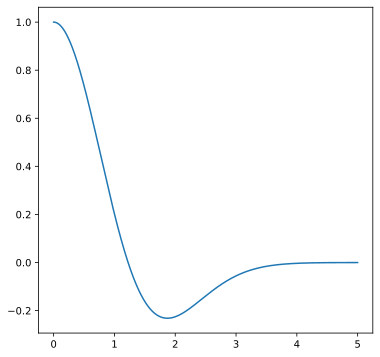

In [159]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rc('figure', figsize=(6, 6))


plt.plot(np.array(r), np.array(u) / np.array(r))